Nama : Astrid Putri Salsabiela <br>
NIM : 211351032 <br>
Kelas : Malam A

# Import Dataset

In [216]:
# Ambil dataset dari Kaggle (pastikan Anda sudah mengatur API Kaggle Anda)
# Ganti <username> dan <key> dengan informasi API Kaggle Anda
# Kaggle API dapat diatur di halaman profil Kaggle Anda
# https://www.kaggle.com/account

# Setelah mengunduh file kaggle.json dari halaman profil Kaggle, upload file tersebut ke penyimpanan tempat Anda menjalankan kode ini.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"astridps","key":"0b7e0b98092ed08d37d76196a3919b2b"}'}

In [165]:
# Pindahkan file kaggle.json ke direktori yang benar
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [166]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [215]:
# Ekstrak file zip
!unzip breast-cancer-wisconsin-data.zip -d breast-cancer-wisconsin-data
!ls breast-cancer-wisconsin-data

unzip:  cannot find or open breast-cancer-wisconsin-data.zip, breast-cancer-wisconsin-data.zip.zip or breast-cancer-wisconsin-data.zip.ZIP.
data.csv


# Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings
warnings.filterwarnings("ignore")

# Data Discovery

In [3]:
# Baca dataset ke dalam DataFrame
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
columns_to_drop = ['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [8]:
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [10]:
df.corr

<bound method DataFrame.corr of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.277

# EDA

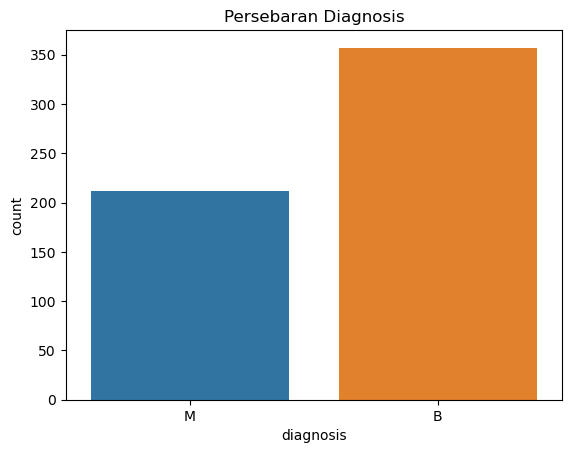

In [11]:
sns.countplot(x='diagnosis', data=df)
plt.title('Persebaran Diagnosis')
plt.show()

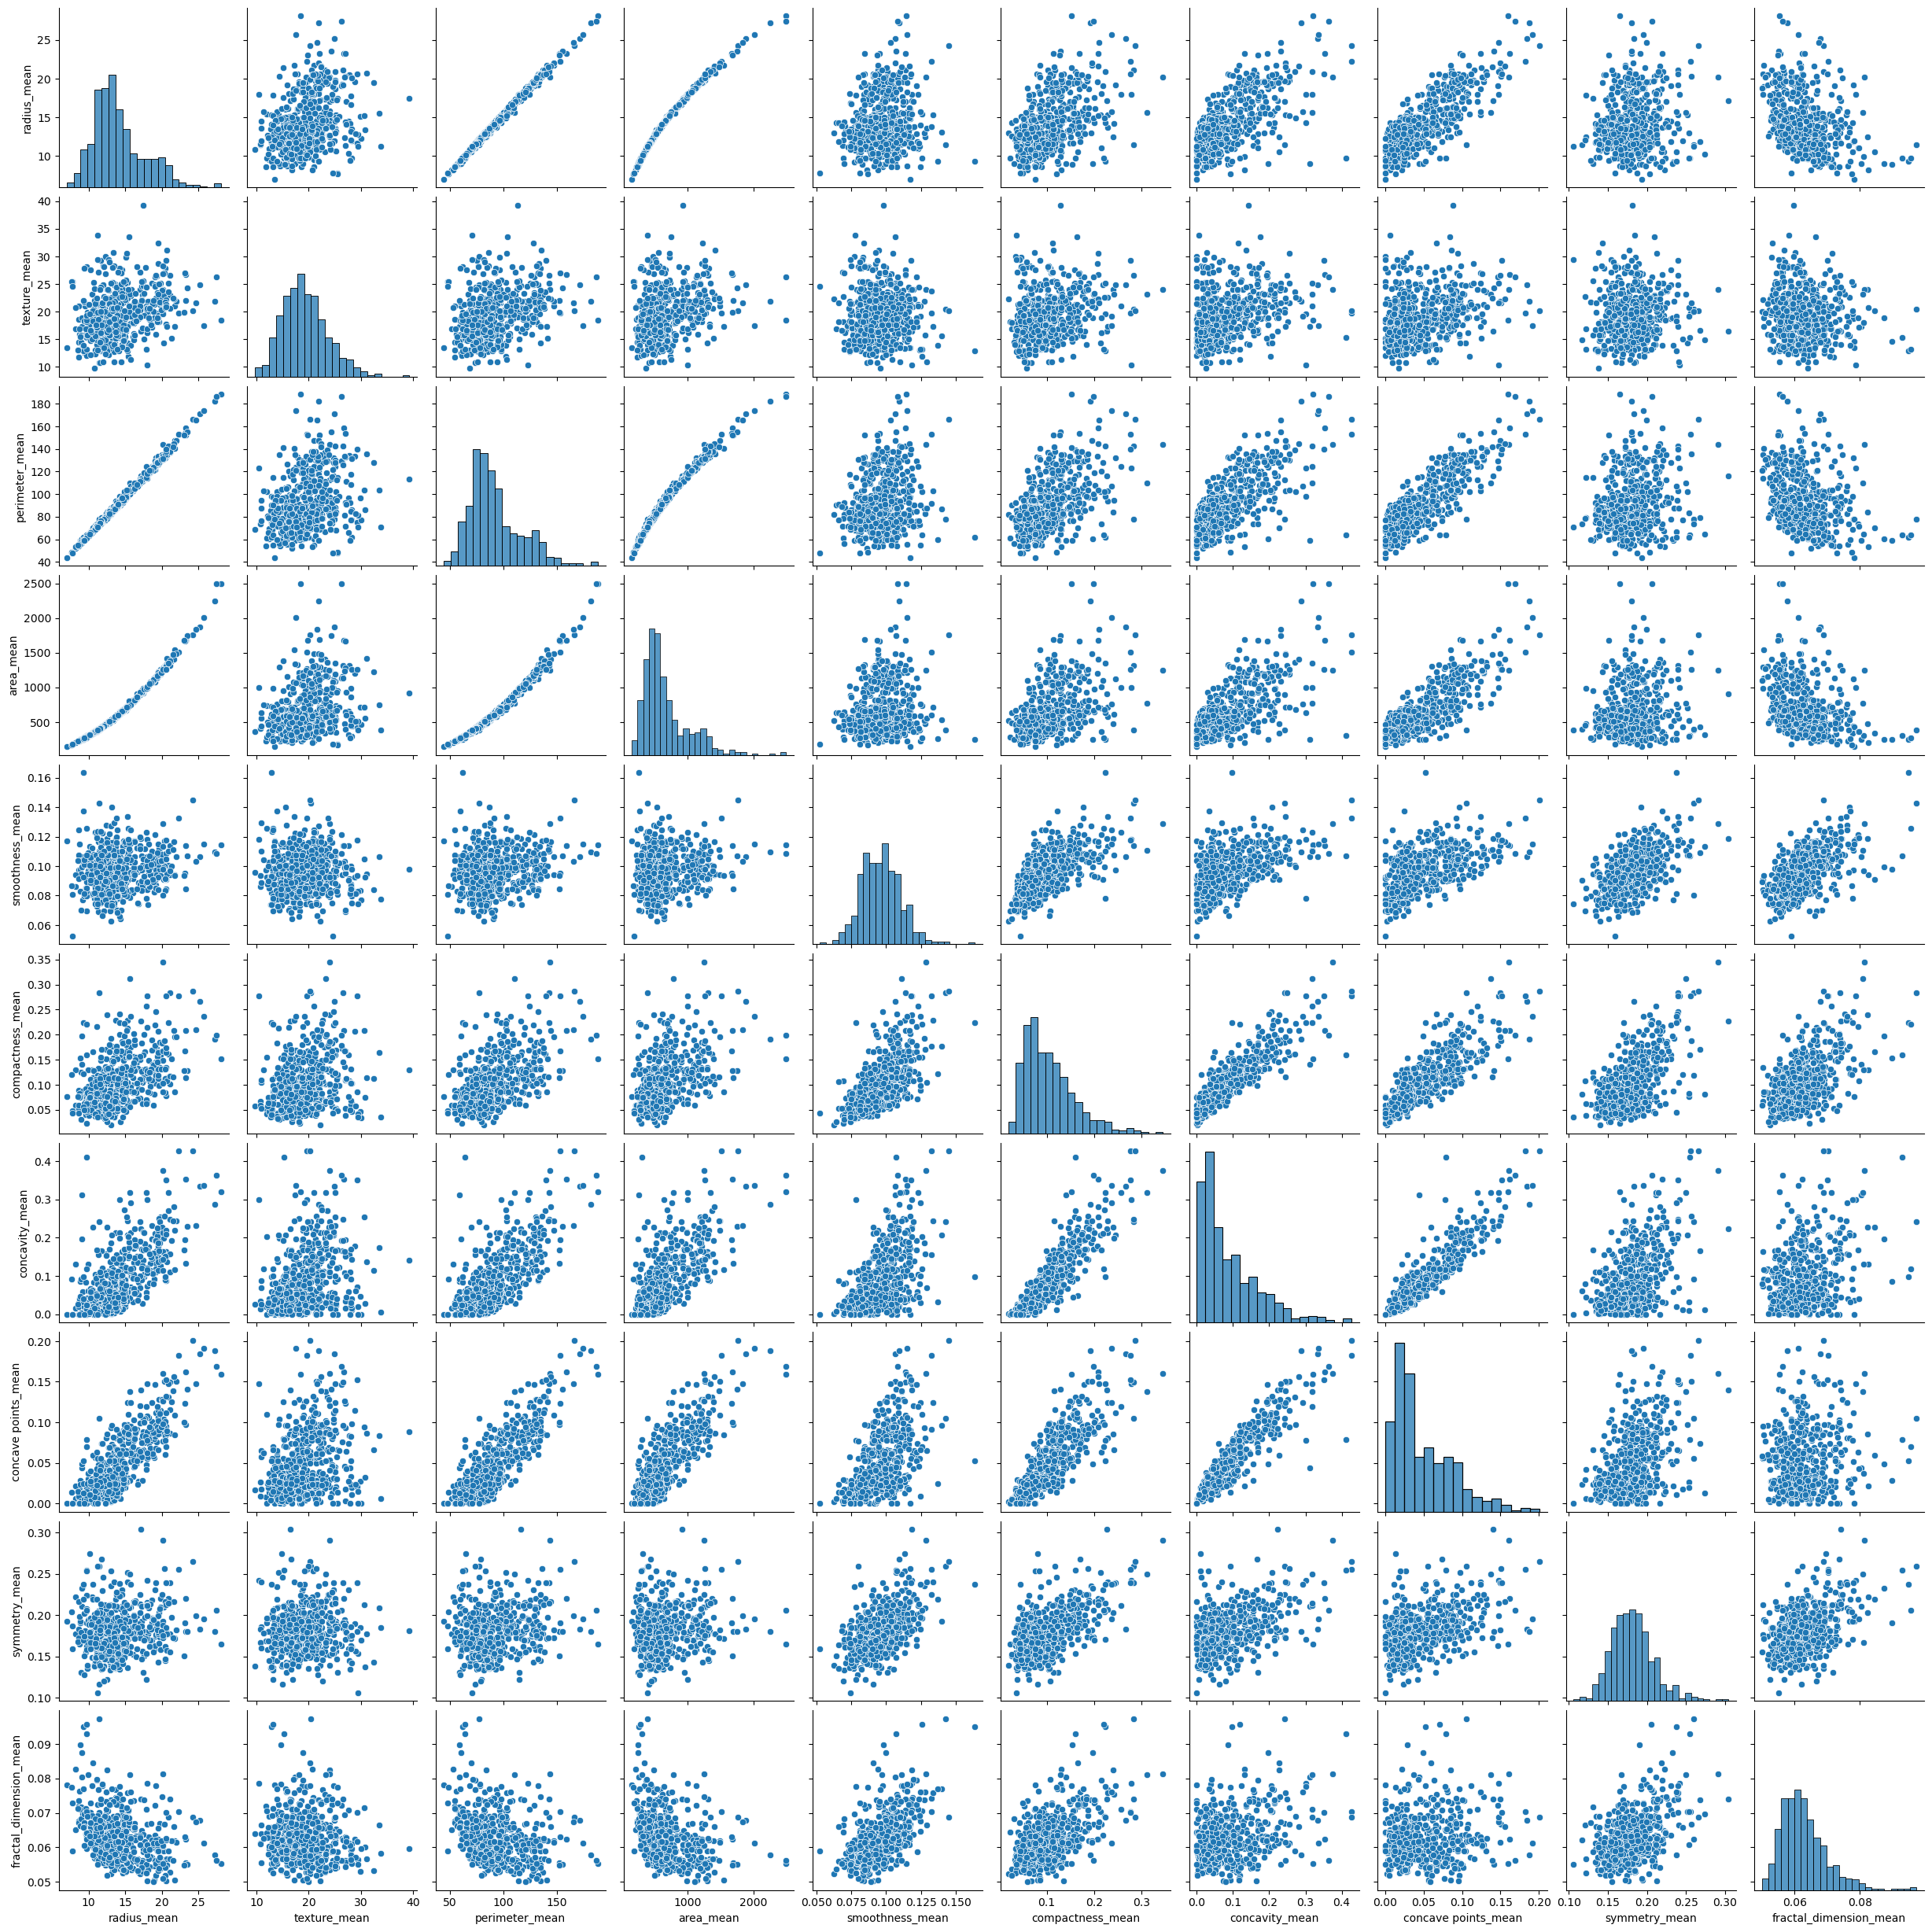

In [12]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']])
plt.show()

In [15]:
temp = df.drop(columns=['diagnosis'],axis=1)

In [16]:
correlation_matrix = temp.corr()

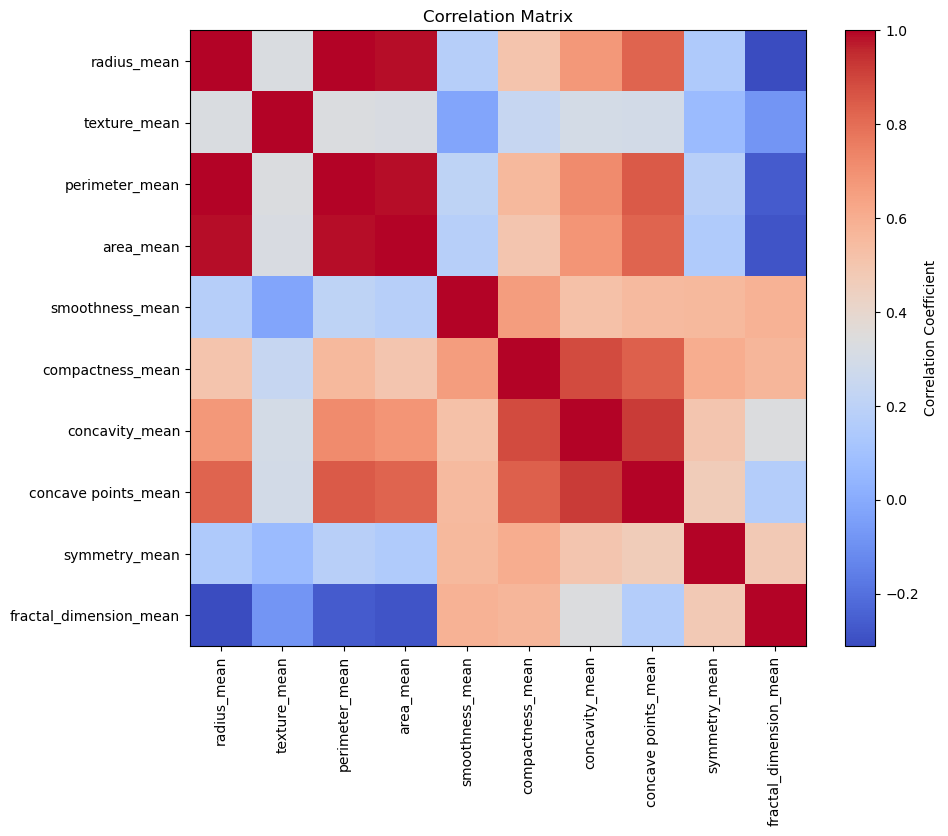

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


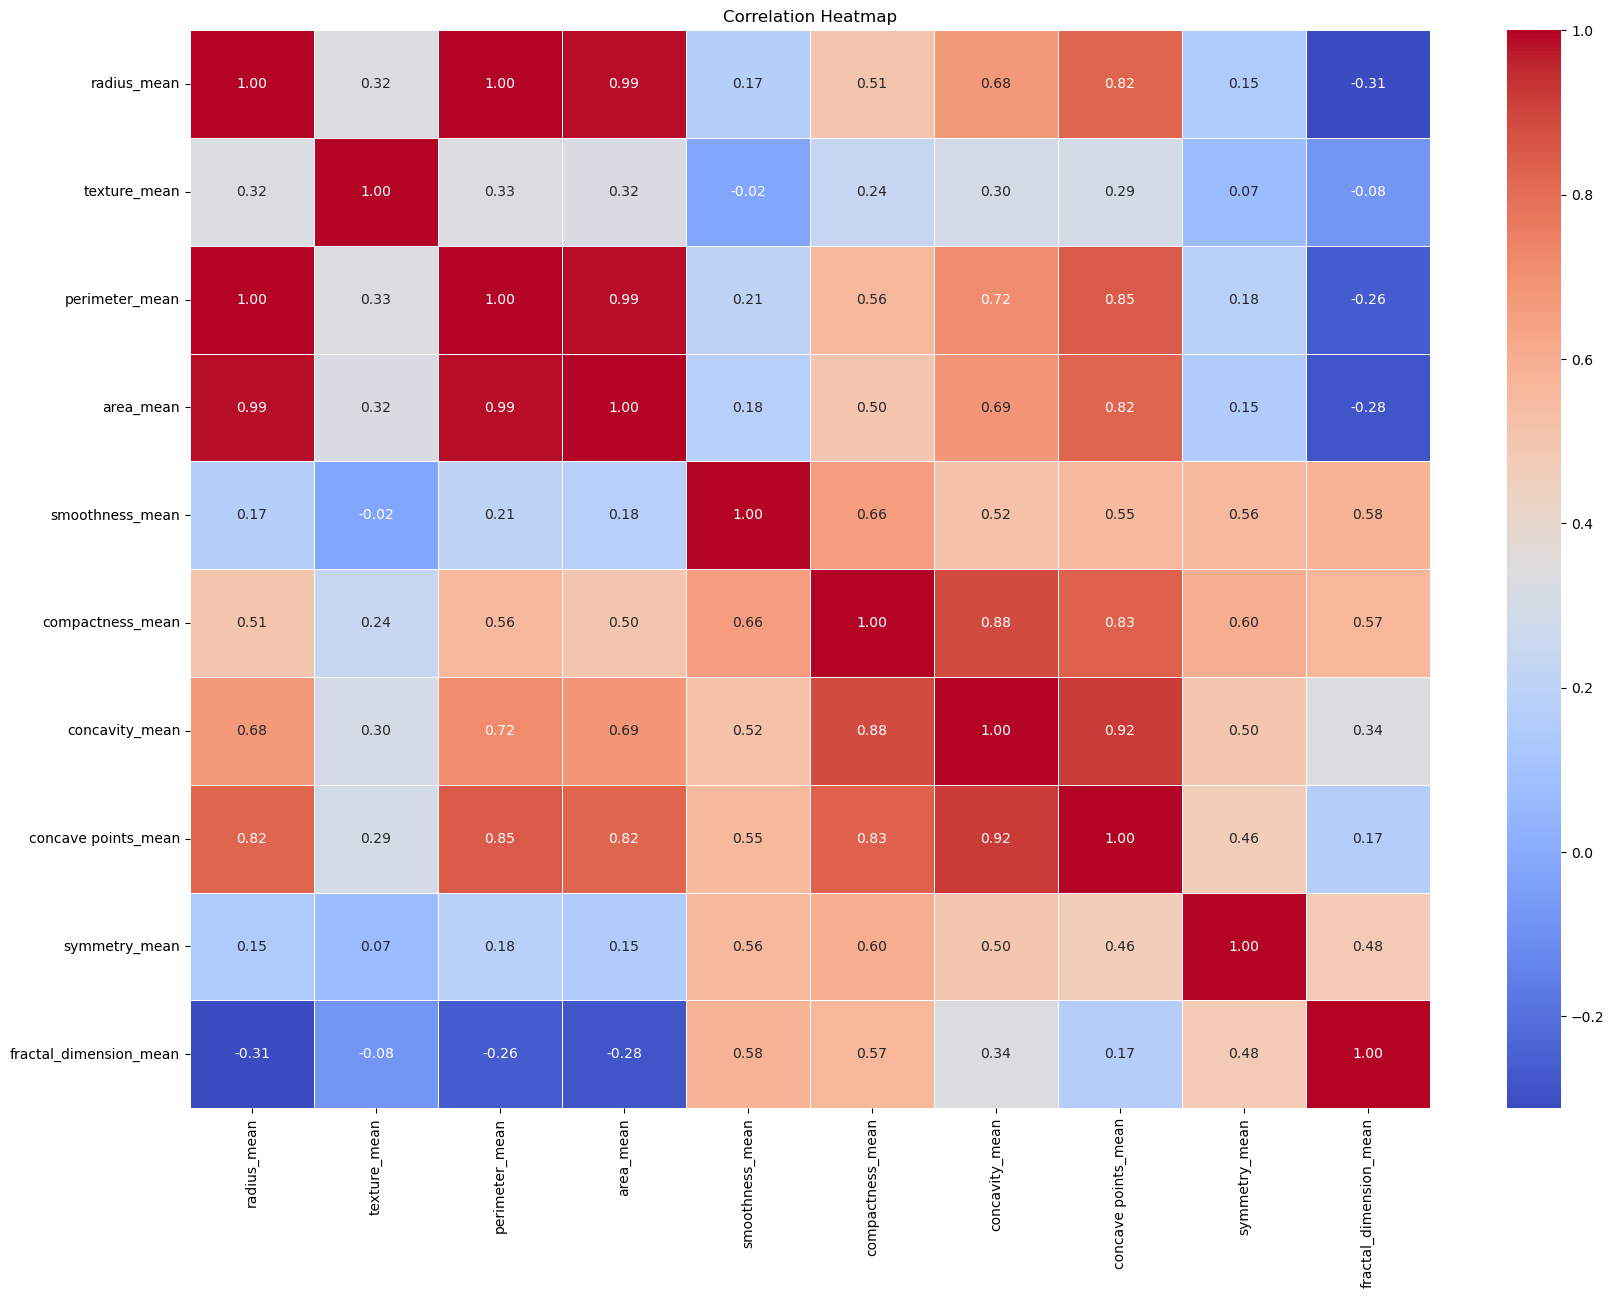

In [18]:
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

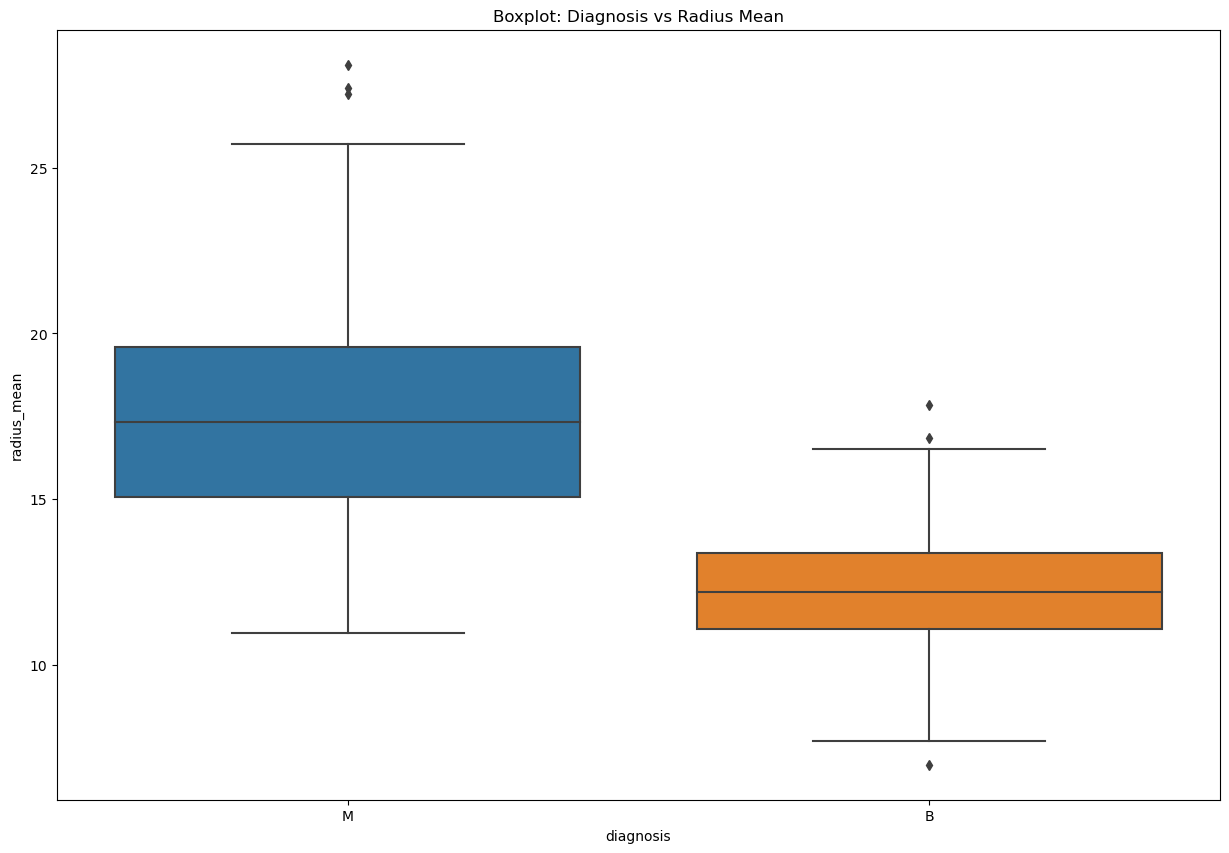

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot: Diagnosis vs Radius Mean')
plt.show()

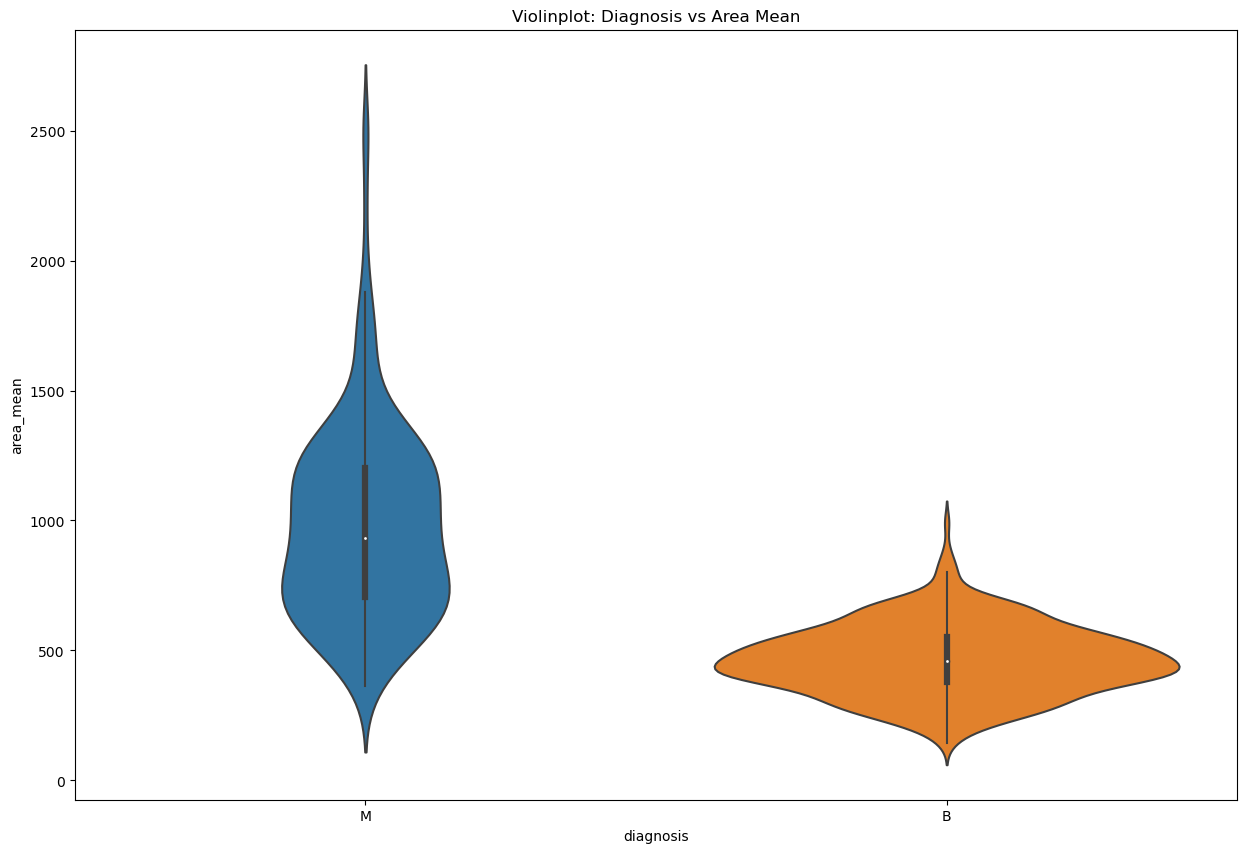

In [20]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='diagnosis', y='area_mean', data=df)
plt.title('Violinplot: Diagnosis vs Area Mean')
plt.show()

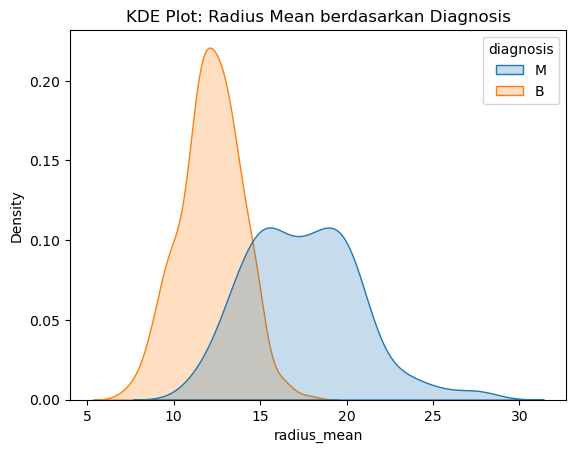

In [21]:
sns.kdeplot(data=df, x='radius_mean', hue='diagnosis', fill=True, common_norm=False)
plt.title('KDE Plot: Radius Mean berdasarkan Diagnosis')
plt.show()

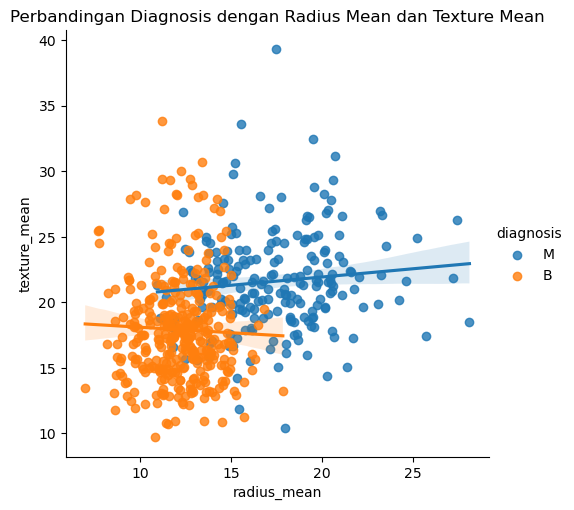

In [22]:
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Perbandingan Diagnosis dengan Radius Mean dan Texture Mean')
plt.show()

<Axes: ylabel='count'>

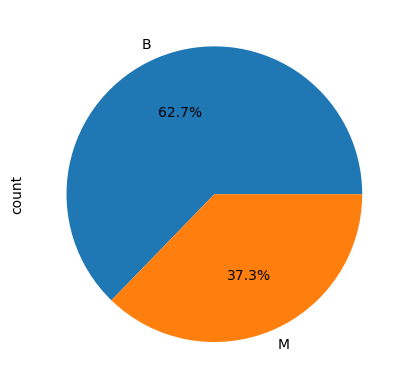

In [23]:
df['diagnosis'].value_counts().plot(kind="pie", autopct="%1.1f%%")

In [24]:
print("We have",df.diagnosis.nunique(),"output values to predict namely M and B")

We have 2 output values to predict namely M and B


# Prepocessing

In [25]:
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])

In [26]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
x = df[features]
y = df['diagnosis']
x.shape, y.shape

((569, 10), (569,))

In [27]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [28]:
df['diagnosis'].replace({"M":"1" , "B":"0"},inplace=True)

In [29]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [30]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [31]:
X = df.drop('diagnosis',axis='columns')
y = df['diagnosis']

In [32]:
StandardScalerModel= StandardScaler()
x = StandardScalerModel.fit_transform(X)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 10)
(171, 10)
(398,)
(171,)


# Modeling

In [35]:
knn = KNeighborsClassifier(n_neighbors=10,)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

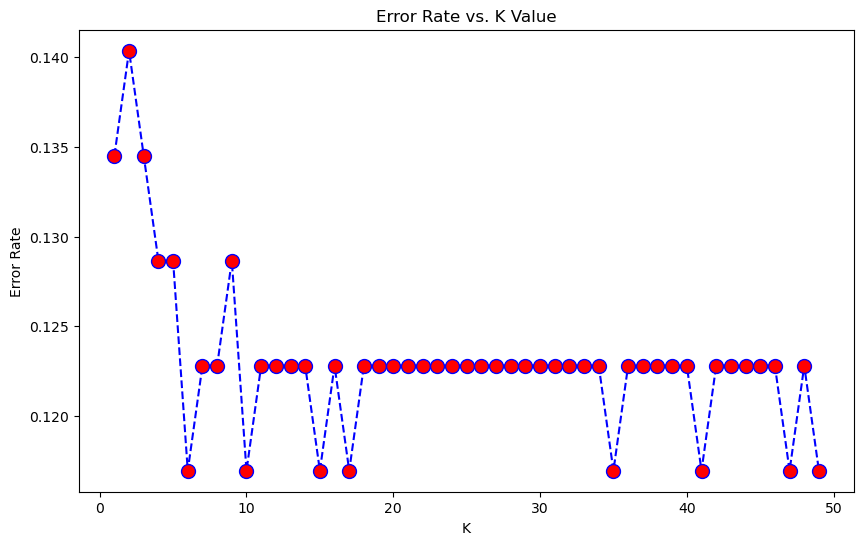

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
pred = knn.predict(x_test)

Confusion matrix without normalization


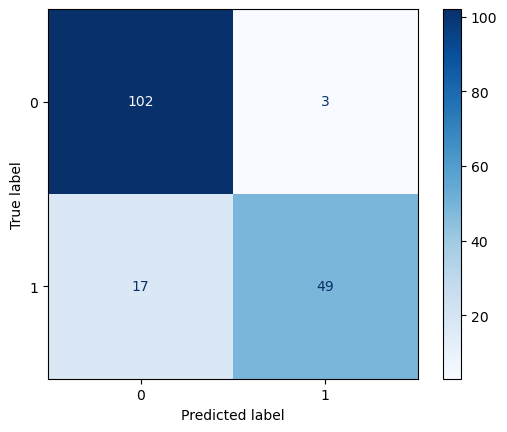

Normalized confusion matrix


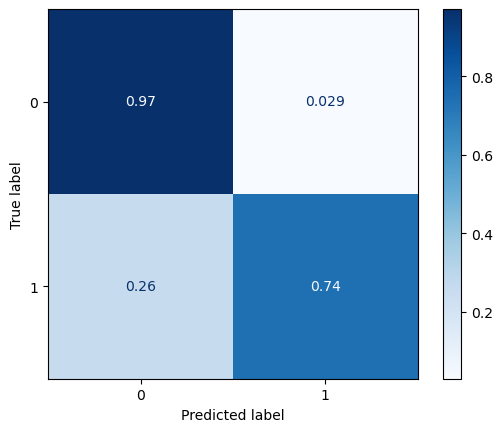

In [39]:
#confusion matrix without normalization
print('Confusion matrix without normalization')
ConfusionMatrixDisplay.from_estimator(

    knn,
    x_test,
    y_test,
    cmap='Blues'

)
plt.show()

#confusion matrix with normalization
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(

    knn,
    x_test,
    y_test,
    normalize='true',
    cmap='Blues'

)
plt.show()

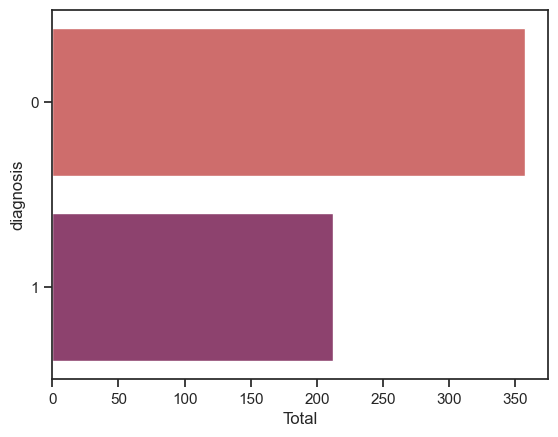

In [40]:
sns.set_theme(style='ticks')
sns.countplot(y='diagnosis', data=df, palette='flare')
plt.ylabel("diagnosis")
plt.xlabel('Total')
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
pred1 = knn.predict(x_train)
print('Testing')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('*******************************************************')
print('training')
print(confusion_matrix(y_train,pred1))
print(classification_report(y_train,pred1))

Testing
[[98  7]
 [15 51]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       105
           1       0.88      0.77      0.82        66

    accuracy                           0.87       171
   macro avg       0.87      0.85      0.86       171
weighted avg       0.87      0.87      0.87       171

*******************************************************
training
[[244   8]
 [ 22 124]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       252
           1       0.94      0.85      0.89       146

    accuracy                           0.92       398
   macro avg       0.93      0.91      0.92       398
weighted avg       0.93      0.92      0.92       398



In [42]:
print('Testing')
print(accuracy_score(y_test,pred))
print('*********************')
print('Training')
print(accuracy_score(y_train,pred1))

Testing
0.8713450292397661
*********************
Training
0.9246231155778895


In [43]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.8713450292397661


# Visualisasi Hasil Algoritma

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [51]:
y_pred = knn.predict(x_test)

In [52]:
conf_matrix = confusion_matrix(y_test,y_pred)

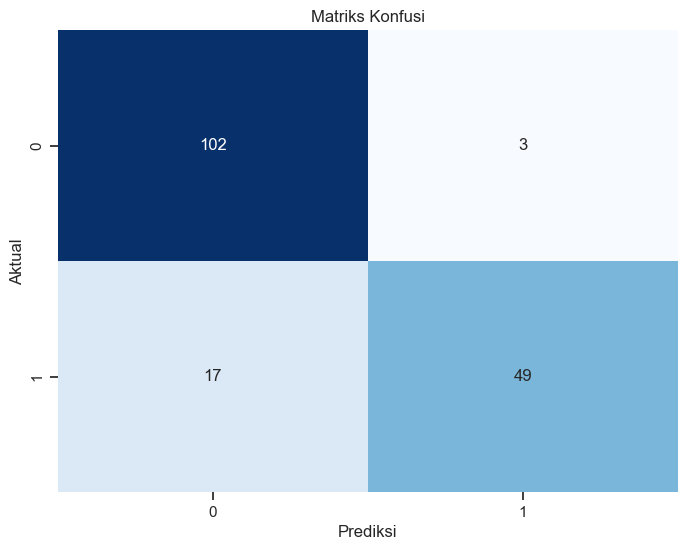

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi')
plt.show()

In [54]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [55]:
score = model1.score(x_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  0.8654970760233918


In [56]:
#radius_mean=17.99, texture_mean=14.34, perimeter_mean=132.90, area_mean=1326.0, smoothness_mean=0.08474, compactness_mean=0.07864, concavity_mean=0.0869, concave points_mean=0.07017, symmetry_mean=0.1812, fractal_dimension_mean=0.05883
input_data = np.array([[17.99, 14.34, 132.90, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05883]])

prediction = model1.predict(input_data)
print('Hasil Diagnosis :', prediction)

Hasil Diagnosis : [1]


In [58]:
testing = {'radius_mean' : [17.99],
           'texture_mean' : [14.34],
           'perimeter_mean' : [132.90],
           'area_mean' : [1326.0],
           'smoothness_mean' : [0.08474],
           'compactness_mean' : [0.07864],
           'concavity_mean' : [0.0869],
           'concave points_mean' : [0.07017],
           'symmetry_mean' : [0.1812],
           'fractal_dimension_mean' : [0.05883]}

testing = pd.DataFrame(testing)
testing

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,14.34,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05883


In [59]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Diagnosis")
print(pred_coba)

Hasil Prediksi dari Diagnosis
[1]


# Save Model

In [70]:
# Define a filename for the pickle file
filename = 'knn_model.sav'

# Pickle (serialize) the model to a file
with open(filename, 'wb') as file:
    pickle.dump(knn,file)